In [1]:
import sys
import os
sys.path.append('/Users/daniellebenbashat/TLProjects/projects_hub/SemanticSeg-Cityscapes')
os.environ['AUTH_SECRET']="48df5983-7d6f-4601-ab65-83e6c435796b"

In [64]:
from typing import Union, List
from enum import Enum
import pandas as pd
from cs_sem_seg.utils.kili_utils import _connect_to_kili, _download
from cs_sem_seg.configs import KILI_PROJECT_ID

In [58]:
# TL clustering algorithm types
class TLClusterAlg(Enum):
    Kmeans = "kmeans"
    Bisecting = "bisecting"
    EstimatedBisecting = "estimated_bisecting"

In [59]:
fpath = "tl_analysis.csv"
# read TL exported .csv with the insights results
df = pd.read_csv(fpath, delimiter="\t")

# filter by the chosen cluster
alg = TLClusterAlg.Kmeans
label = 4
dis_thresh = 5
sample = df[df[f"clusters_{alg.value}"] == label]

# take the unlabeled samples
sample = sample[sample.dataset_state == "unlabeled"]

<Axes: ylabel='Frequency'>

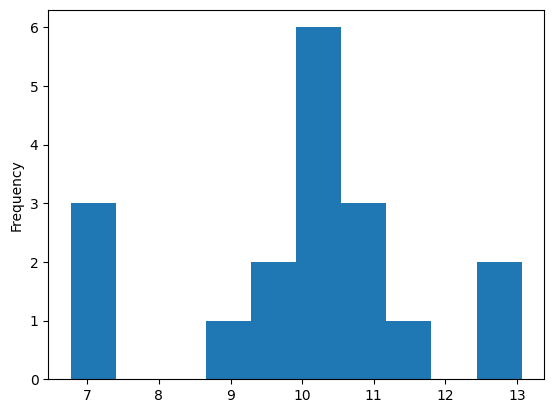

In [61]:
# plot the cluster distances histogram 
sample[f"distance_clusters_{alg.value}"].plot(kind="hist")

In [45]:
# choose the 50% most similar samples to cluster representation 
dis_thresh = sample[f"distance_clusters_{alg.value}"].quantile(q=0.5)
sample = sample[sample[f"distance_clusters_{alg.value}"] < dis_thresh]

In [52]:
# get the selected samples kili identifiers
external_ids = sample["metadata.json_data_kili_external_id"].values

# connect to kili
kili = _connect_to_kili()

# get the selected samples
assets = kili.assets(project_id=KILI_PROJECT_ID, external_id_strictly_in=list(external_ids))

 # convert the labels status to be reviewed manualy
for sample in assets:
    sample['status'] = 'TODO'   

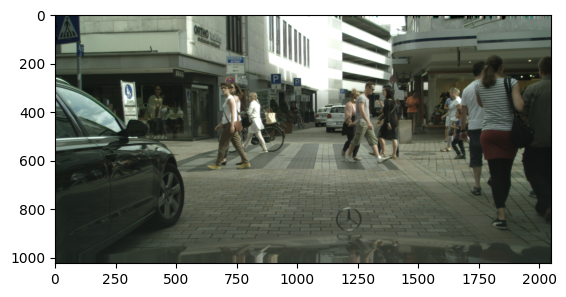

In [79]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# show a sample from the chosen images to review their labels
i = 0
img_url = assets[i]['content']

# Download the image
response = requests.get(img_url)
image = Image.open(BytesIO(response.content))

plt.imshow(image)